# Capstone Project - Battle of the Neighbourhoods

### Applied Data Sceince Capstone by IBM/ Coursera

# Table of Contents

1. Introduction: Business Problem
2. Data Acquisition and Cleaning 
3. Methodology
4. Analysis
5. Results 
6. Discussion
7. Conclusion

# Introduction: Business Problem

# Data 

The data will come from three different sources:

# Methodology

### Before getting the data, the relevant libraries must be imported first

In [1]:
import numpy as np 

import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import zipfile

import json 

from geopy.geocoders import Nominatim 

import requests 
from pandas.io.json import json_normalize 
import lxml.html as lh

import matplotlib.cm as cm
import matplotlib.colors as colors

from sklearn.cluster import KMeans

!pip install folium
import folium 

%matplotlib inline 
from sklearn.cluster import KMeans
from sklearn import datasets
import matplotlib.pyplot as plt

print('Libraries imported.')

Libraries imported.


### Importing New York data as the second dataset

In [2]:
!wget -q -O 'newyork_data.json' https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/labs/newyork_data.json
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)
newyork_data

{'type': 'FeatureCollection',
 'totalFeatures': 306,
 'features': [{'type': 'Feature',
   'id': 'nyu_2451_34572.1',
   'geometry': {'type': 'Point',
    'coordinates': [-73.84720052054902, 40.89470517661]},
   'geometry_name': 'geom',
   'properties': {'name': 'Wakefield',
    'stacked': 1,
    'annoline1': 'Wakefield',
    'annoline2': None,
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.84720052054902,
     40.89470517661,
     -73.84720052054902,
     40.89470517661]}},
  {'type': 'Feature',
   'id': 'nyu_2451_34572.2',
   'geometry': {'type': 'Point',
    'coordinates': [-73.82993910812398, 40.87429419303012]},
   'geometry_name': 'geom',
   'properties': {'name': 'Co-op City',
    'stacked': 2,
    'annoline1': 'Co-op',
    'annoline2': 'City',
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.82993910812398,
     40.87429419303012,
     -73.82993910812398,
     40.87429419303012]}},
  {'type': 'Feature',
 

In [3]:
neighbourhoods_data = newyork_data['features']

In [4]:
neighbourhoods_data[0]

{'type': 'Feature',
 'id': 'nyu_2451_34572.1',
 'geometry': {'type': 'Point',
  'coordinates': [-73.84720052054902, 40.89470517661]},
 'geometry_name': 'geom',
 'properties': {'name': 'Wakefield',
  'stacked': 1,
  'annoline1': 'Wakefield',
  'annoline2': None,
  'annoline3': None,
  'annoangle': 0.0,
  'borough': 'Bronx',
  'bbox': [-73.84720052054902,
   40.89470517661,
   -73.84720052054902,
   40.89470517661]}}

1. Transforming the data into a pandas dataframe 

In [5]:
column_names = ['Borough', 'Neighbourhood', 'Latitude', 'Longitude'] 
neighbourhoods = pd.DataFrame(columns=column_names)

for data in neighbourhoods_data:
    borough = neighbourhood_name = data['properties']['borough'] 
    neighbourhood_name = data['properties']['name']
        
    neighbourhood_latlon = data['geometry']['coordinates']
    neighbourhood_lat = neighbourhood_latlon[1]
    neighbourhood_lon = neighbourhood_latlon[0]
    
    neighbourhoods = neighbourhoods.append({'Borough': borough,
                                          'Neighbourhood': neighbourhood_name,
                                          'Latitude': neighbourhood_lat,
                                          'Longitude': neighbourhood_lon}, ignore_index=True)

In [6]:
df_ny = neighbourhoods
df_ny.head()

,Borough,Neighbourhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


Using the folium library to view the whole of New York City. 

In [7]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)

for lat, lng, borough, neighbourhood in zip(df_ny['Latitude'], df_ny['Longitude'], df_ny['Borough'], df_ny['Neighbourhood']):
    label = '{}, {}'.format(neighbourhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


The New York data is going to be segmented into only looking at the Staten Island borough.   
The original dataframe is going to be sliced and create a new dataframe of the Staten Island data.

In [8]:
df_staten = neighbourhoods[neighbourhoods['Borough'] == 'Staten Island'].reset_index(drop=True)
df_staten.head()

,Borough,Neighbourhood,Latitude,Longitude
0,Staten Island,St. George,40.644982,-74.079353
1,Staten Island,New Brighton,40.640615,-74.087017
2,Staten Island,Stapleton,40.626928,-74.077902
3,Staten Island,Rosebank,40.615305,-74.069805
4,Staten Island,West Brighton,40.631879,-74.107182


Now only making a map of the Staten Island data:

In [9]:
address = 'Staten Island, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

map_staten = folium.Map(location=[latitude, longitude], zoom_start=11)

for lat, lng, borough, neighbourhood in zip(df_staten['Latitude'], df_staten['Longitude'], df_staten['Borough'], df_staten['Neighbourhood']):
    label = '{}, {}'.format(neighbourhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_staten)  
    
map_staten

## Exploratory data analysis

Defining Foursquare Credentials and Version

In [10]:
# The code was removed by Watson Studio for sharing.

Firstly the analysis will be done on Toronto and then will be repeated for Staten Island.  This will ensure that the data is comparable as the analysis is the same.

### Exploring the Neighbourhoods in Staten Island

In [11]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        results = requests.get(url).json()["response"]["groups"][0]['items']
        
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

Creating a new dataframe for Staten Island that has all the venues returned for each neighbourhood

In [12]:
staten_venues = getNearbyVenues(names=df_staten['Neighbourhood'],
                                   latitudes=df_staten['Latitude'],
                                   longitudes=df_staten['Longitude']
                                  )
staten_venues.groupby('Neighbourhood').count()

St. George
New Brighton
Stapleton
Rosebank
West Brighton
Grymes Hill
Todt Hill
South Beach
Port Richmond
Mariner's Harbor
Port Ivory
Castleton Corners
New Springville
Travis
New Dorp
Oakwood
Great Kills
Eltingville
Annadale
Woodrow
Tottenville
Tompkinsville
Silver Lake
Sunnyside
Park Hill
Westerleigh
Graniteville
Arlington
Arrochar
Grasmere
Old Town
Dongan Hills
Midland Beach
Grant City
New Dorp Beach
Bay Terrace
Huguenot
Pleasant Plains
Butler Manor
Charleston
Rossville
Arden Heights
Greenridge
Heartland Village
Chelsea
Bloomfield
Bulls Head
Richmond Town
Shore Acres
Clifton
Concord
Emerson Hill
Randall Manor
Howland Hook
Elm Park
Manor Heights
Willowbrook
Sandy Ground
Egbertville
Prince's Bay
Lighthouse Hill
Richmond Valley
Fox Hills


,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighbourhood,,,,,,
Annadale,13,13,13,13,13,13
Arden Heights,5,5,5,5,5,5
Arlington,5,5,5,5,5,5
Arrochar,21,21,21,21,21,21
Bay Terrace,8,8,8,8,8,8
Bloomfield,4,4,4,4,4,4
Bulls Head,46,46,46,46,46,46
Butler Manor,6,6,6,6,6,6
Castleton Corners,13,13,13,13,13,13


Seeing how many unique categories for Staten Island can be curated from all the returned venues:

In [13]:
print('There are {} uniques categories for Staten Island.'.format(len(staten_venues['Venue Category'].unique())))

There are 180 uniques categories for Staten Island.


### Analysing each neighbourhood 

Group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

#### 2. Staten Island

In [14]:
# one hot encoding
staten_onehot = pd.get_dummies(staten_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
staten_onehot['Neighbourhood'] = staten_venues['Neighbourhood'] 

# move neighborhood column to the first column
fixed_columns = [staten_onehot.columns[-1]] + list(staten_onehot.columns[:-1])
staten_onehot = staten_onehot[fixed_columns]

staten_onehot.head()

,Neighbourhood,ATM,American Restaurant,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Beach,Beer Bar,Big Box Store,Board Shop,Boat or Ferry,Bookstore,Bowling Alley,Breakfast Spot,Brewery,Burger Joint,Bus Station,Bus Stop,Cafeteria,Café,Cajun / Creole Restaurant,Campground,Caribbean Restaurant,Casino,Chinese Restaurant,Clothing Store,Coffee Shop,Comedy Club,Comfort Food Restaurant,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Doctor's Office,Dog Run,Donut Shop,Dry Cleaner,Eastern European Restaurant,Electronics Store,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fishing Spot,Flower Shop,Food,Food & Drink Shop,Food Truck,French Restaurant,Furniture / Home Store,Gas Station,Gastropub,German Restaurant,Gift Shop,Go Kart Track,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Hardware Store,Health & Beauty Service,Historic Site,Hobby Shop,Home Service,Hookah Bar,Hotel,IT Services,Ice Cream Shop,Indian Restaurant,Intersection,Italian Restaurant,Japanese Restaurant,Juice Bar,Kids Store,Laundry Service,Lawyer,Liquor Store,Locksmith,Market,Martial Arts School,Mattress Store,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Motorcycle Shop,Moving Target,Museum,Music Store,Music Venue,Nail Salon,New American Restaurant,Nightlife Spot,Optical Shop,Outdoors & Recreation,Outlet Mall,Park,Peruvian Restaurant,Pet Store,Pharmacy,Pier,Pizza Place,Playground,Plaza,Polish Restaurant,Pool,Racetrack,Recording Studio,Recreation Center,Rental Car Location,Residential Building (Apartment / Condo),Restaurant,Rock Club,Salon / Barbershop,Sandwich Place,Scenic Lookout,Shipping Store,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Soup Place,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Sports Club,Sri Lankan Restaurant,Steakhouse,Storage Facility,Supermarket,Supplement Shop,Sushi Restaurant,Taco Place,Tanning Salon,Tapas Restaurant,Tattoo Parlor,Tex-Mex Restaurant,Thai Restaurant,Theater,Theme Park,Thrift / Vintage Store,Toll Plaza,Tourist Information Center,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Wings Joint,Women's Store,Yoga Studio
0,St. George,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,St. George,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,St. George,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,St. George,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [15]:
staten_grouped = staten_onehot.groupby('Neighbourhood').mean().reset_index()
staten_grouped.head()

,Neighbourhood,ATM,American Restaurant,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Beach,Beer Bar,Big Box Store,Board Shop,Boat or Ferry,Bookstore,Bowling Alley,Breakfast Spot,Brewery,Burger Joint,Bus Station,Bus Stop,Cafeteria,Café,Cajun / Creole Restaurant,Campground,Caribbean Restaurant,Casino,Chinese Restaurant,Clothing Store,Coffee Shop,Comedy Club,Comfort Food Restaurant,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Doctor's Office,Dog Run,Donut Shop,Dry Cleaner,Eastern European Restaurant,Electronics Store,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fishing Spot,Flower Shop,Food,Food & Drink Shop,Food Truck,French Restaurant,Furniture / Home Store,Gas Station,Gastropub,German Restaurant,Gift Shop,Go Kart Track,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Hardware Store,Health & Beauty Service,Historic Site,Hobby Shop,Home Service,Hookah Bar,Hotel,IT Services,Ice Cream Shop,Indian Restaurant,Intersection,Italian Restaurant,Japanese Restaurant,Juice Bar,Kids Store,Laundry Service,Lawyer,Liquor Store,Locksmith,Market,Martial Arts School,Mattress Store,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Motorcycle Shop,Moving Target,Museum,Music Store,Music Venue,Nail Salon,New American Restaurant,Nightlife Spot,Optical Shop,Outdoors & Recreation,Outlet Mall,Park,Peruvian Restaurant,Pet Store,Pharmacy,Pier,Pizza Place,Playground,Plaza,Polish Restaurant,Pool,Racetrack,Recording Studio,Recreation Center,Rental Car Location,Residential Building (Apartment / Condo),Restaurant,Rock Club,Salon / Barbershop,Sandwich Place,Scenic Lookout,Shipping Store,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Soup Place,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Sports Club,Sri Lankan Restaurant,Steakhouse,Storage Facility,Supermarket,Supplement Shop,Sushi Restaurant,Taco Place,Tanning Salon,Tapas Restaurant,Tattoo Parlor,Tex-Mex Restaurant,Thai Restaurant,Theater,Theme Park,Thrift / Vintage Store,Toll Plaza,Tourist Information Center,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Wings Joint,Women's Store,Yoga Studio
0,Annadale,0.0,0.076923,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.076923,0.000000,0.0,0.0,0.0,0.076923,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.076923,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.076923,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.076923,0.0,0.384615,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.076923,0.0,0.000,0.000000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.076923,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Arden Heights,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.200000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.200,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [16]:
num_top_venues = 5

for hood in staten_grouped['Neighbourhood']:
    print("----"+hood+"----")
    temp = staten_grouped[staten_grouped['Neighbourhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Annadale----
          venue  freq
0   Pizza Place  0.38
1    Restaurant  0.08
2  Liquor Store  0.08
3  Dance Studio  0.08
4      Pharmacy  0.08


----Arden Heights----
           venue  freq
0    Coffee Shop   0.2
1    Pizza Place   0.2
2  Deli / Bodega   0.2
3   Home Service   0.2
4       Pharmacy   0.2


----Arlington----
                 venue  freq
0         Intersection   0.2
1        Deli / Bodega   0.2
2             Bus Stop   0.2
3          Coffee Shop   0.2
4  American Restaurant   0.2


----Arrochar----
                venue  freq
0  Italian Restaurant  0.10
1            Bus Stop  0.10
2         Pizza Place  0.10
3       Deli / Bodega  0.10
4      Sandwich Place  0.05


----Bay Terrace----
              venue  freq
0       Supermarket  0.25
1        Donut Shop  0.12
2  Sushi Restaurant  0.12
3    Shipping Store  0.12
4      Home Service  0.12


----Bloomfield----
               venue  freq
0       Burger Joint  0.25
1  Recreation Center  0.25
2           Bus Stop  0.25
3

In [17]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [18]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
staten_neighbourhoods_venues_sorted = pd.DataFrame(columns=columns)
staten_neighbourhoods_venues_sorted['Neighbourhood'] = staten_grouped['Neighbourhood']

for ind in np.arange(staten_grouped.shape[0]):
    staten_neighbourhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(staten_grouped.iloc[ind, :], num_top_venues)

staten_neighbourhoods_venues_sorted.head()

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Annadale,Pizza Place,Dance Studio,American Restaurant,Restaurant,Diner,Train Station,Pharmacy,Food,Liquor Store,Event Space
1,Arden Heights,Deli / Bodega,Home Service,Pizza Place,Coffee Shop,Pharmacy,Electronics Store,Fishing Spot,Fish & Chips Shop,Filipino Restaurant,Fast Food Restaurant
2,Arlington,Deli / Bodega,American Restaurant,Intersection,Bus Stop,Coffee Shop,Falafel Restaurant,Food,Flower Shop,Fishing Spot,Fish & Chips Shop
3,Arrochar,Deli / Bodega,Pizza Place,Bus Stop,Italian Restaurant,Liquor Store,Cosmetics Shop,Pharmacy,Sandwich Place,Outdoors & Recreation,Polish Restaurant
4,Bay Terrace,Supermarket,Home Service,Salon / Barbershop,Sushi Restaurant,Shipping Store,Donut Shop,Italian Restaurant,Diner,Event Space,Department Store


## Clustering the neighbourhoods

Running k-means to cluster the neighbourhood into 4 clusters

In [19]:
# set number of clusters
kclusters = 4

staten_grouped_clustering = staten_grouped.drop('Neighbourhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(staten_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 1, 3, 1, 1, 3, 1, 1, 1, 1], dtype=int32)

Using the Elbow method to confirm that 4 is the best number of clusters to use.

In [20]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(staten_grouped_clustering)
    distortions.append(kmeanModel.inertia_)

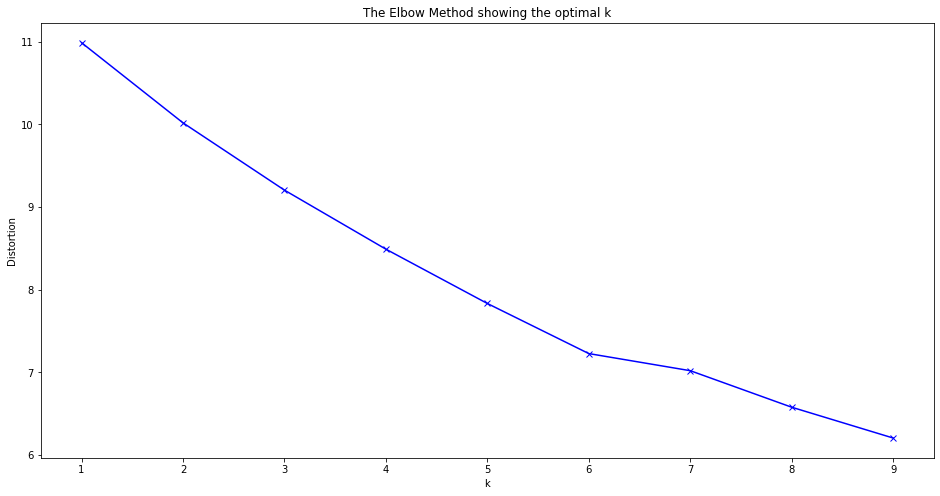

In [21]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [22]:
# add clustering labels
staten_neighbourhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

staten_merged = df_staten

# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
staten_merged = staten_merged.join(staten_neighbourhoods_venues_sorted.set_index('Neighbourhood'), on='Neighbourhood')

staten_merged.head() # check the last columns!

,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Staten Island,St. George,40.644982,-74.079353,1,Clothing Store,Sporting Goods Shop,Bar,Italian Restaurant,Park,Pizza Place,Plaza,Convenience Store,Donut Shop,Coffee Shop
1,Staten Island,New Brighton,40.640615,-74.087017,3,Bus Stop,Deli / Bodega,Park,Greek Restaurant,Discount Store,Playground,Bowling Alley,Hardware Store,Electronics Store,Fish & Chips Shop
2,Staten Island,Stapleton,40.626928,-74.077902,1,Discount Store,Sandwich Place,Bank,Bar,Pizza Place,Residential Building (Apartment / Condo),Fast Food Restaurant,Spanish Restaurant,Skate Park,Sri Lankan Restaurant
3,Staten Island,Rosebank,40.615305,-74.069805,1,Italian Restaurant,Pizza Place,Grocery Store,Ice Cream Shop,Storage Facility,Breakfast Spot,Burger Joint,Mexican Restaurant,Cajun / Creole Restaurant,Museum
4,Staten Island,West Brighton,40.631879,-74.107182,1,Coffee Shop,Pharmacy,Bank,Italian Restaurant,Music Store,Breakfast Spot,Bar,Bus Stop,Café,Chinese Restaurant


In [23]:
# create map
staten_map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(staten_merged['Latitude'], staten_merged['Longitude'], staten_merged['Neighbourhood'], staten_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(staten_map_clusters)
       
staten_map_clusters

### Examining the clusters 

#### Cluster 1

In [64]:
# red 
cluster1 = staten_merged.loc[staten_merged['Cluster Labels'] == 0, staten_merged.columns[[1] + list(range(5, staten_merged.shape[1]))]]
cluster1

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,Todt Hill,Park,Yoga Studio,Food & Drink Shop,Flower Shop,Fishing Spot,Fish & Chips Shop,Filipino Restaurant,Fast Food Restaurant,Farmers Market,Falafel Restaurant
44,Chelsea,Steakhouse,Park,Sandwich Place,Spanish Restaurant,Fishing Spot,Fish & Chips Shop,Filipino Restaurant,Fast Food Restaurant,Farmers Market,Falafel Restaurant


#### Cluster 2

In [30]:
# purple
cluster2 = staten_merged.loc[staten_merged['Cluster Labels'] == 1, staten_merged.columns[[1] + list(range(5, staten_merged.shape[1]))]]
cluster2

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,St. George,Clothing Store,Sporting Goods Shop,Bar,Italian Restaurant,Park,Pizza Place,Plaza,Convenience Store,Donut Shop,Coffee Shop
2,Stapleton,Discount Store,Sandwich Place,Bank,Bar,Pizza Place,Residential Building (Apartment / Condo),Fast Food Restaurant,Spanish Restaurant,Skate Park,Sri Lankan Restaurant
3,Rosebank,Italian Restaurant,Pizza Place,Grocery Store,Ice Cream Shop,Storage Facility,Breakfast Spot,Burger Joint,Mexican Restaurant,Cajun / Creole Restaurant,Museum
4,West Brighton,Coffee Shop,Pharmacy,Bank,Italian Restaurant,Music Store,Breakfast Spot,Bar,Bus Stop,Café,Chinese Restaurant
5,Grymes Hill,Dog Run,Deli / Bodega,American Restaurant,Falafel Restaurant,Food & Drink Shop,Food,Flower Shop,Fishing Spot,Fish & Chips Shop,Filipino Restaurant
7,South Beach,Pier,ATM,Athletics & Sports,Beach,Deli / Bodega,Art Museum,Falafel Restaurant,Food & Drink Shop,Food,Flower Shop
8,Port Richmond,Pizza Place,Food Truck,Donut Shop,Rental Car Location,Diner,Falafel Restaurant,Food,Flower Shop,Fishing Spot,Fish & Chips Shop
9,Mariner's Harbor,Deli / Bodega,Italian Restaurant,Bus Stop,Athletics & Sports,Supermarket,Hobby Shop,Event Space,Flower Shop,Hookah Bar,Fishing Spot
10,Port Ivory,Recording Studio,Bar,Yoga Studio,Event Space,Food,Flower Shop,Fishing Spot,Fish & Chips Shop,Filipino Restaurant,Fast Food Restaurant
11,Castleton Corners,Pizza Place,Ice Cream Shop,Sandwich Place,Go Kart Track,Tattoo Parlor,Bar,Bank,Bagel Shop,Grocery Store,Burger Joint


#### Cluster 3

In [32]:
#blue
cluster3 = staten_merged.loc[staten_merged['Cluster Labels'] == 2, staten_merged.columns[[1] + list(range(5, staten_merged.shape[1]))]]
cluster3

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
53,Howland Hook,Fishing Spot,Yoga Studio,Food Truck,Food,Flower Shop,Fish & Chips Shop,Filipino Restaurant,Fast Food Restaurant,Farmers Market,Falafel Restaurant


#### Cluster 4

In [33]:
# yellow
cluster4 = staten_merged.loc[staten_merged['Cluster Labels'] == 3, staten_merged.columns[[1] + list(range(5, staten_merged.shape[1]))]]
cluster4

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,New Brighton,Bus Stop,Deli / Bodega,Park,Greek Restaurant,Discount Store,Playground,Bowling Alley,Hardware Store,Electronics Store,Fish & Chips Shop
24,Park Hill,Bus Stop,Coffee Shop,Hotel,Athletics & Sports,Gym / Fitness Center,Event Space,Flower Shop,Fishing Spot,Fish & Chips Shop,Filipino Restaurant
27,Arlington,Deli / Bodega,American Restaurant,Intersection,Bus Stop,Coffee Shop,Falafel Restaurant,Food,Flower Shop,Fishing Spot,Fish & Chips Shop
45,Bloomfield,Recreation Center,Burger Joint,Bus Stop,Theme Park,Food,Flower Shop,Fishing Spot,Fish & Chips Shop,Filipino Restaurant,Fast Food Restaurant
56,Willowbrook,Bus Stop,Pizza Place,Yoga Studio,Event Space,Flower Shop,Fishing Spot,Fish & Chips Shop,Filipino Restaurant,Fast Food Restaurant,Farmers Market
57,Sandy Ground,Bus Stop,Food Truck,Racetrack,Intersection,Art Gallery,Historic Site,Fish & Chips Shop,Playground,Event Space,Fishing Spot
62,Fox Hills,Bus Stop,Bus Station,Sandwich Place,Playground,Yoga Studio,Event Space,Fishing Spot,Fish & Chips Shop,Filipino Restaurant,Fast Food Restaurant


#### Looking at how many neighbourhoods per cluster

In [41]:
fish_chips = staten_grouped[["Neighbourhood", "Fish & Chips Shop"]]
fish_chips.head()

,Neighbourhood,Fish & Chips Shop
0,Annadale,0.0
1,Arden Heights,0.0
2,Arlington,0.0
3,Arrochar,0.0
4,Bay Terrace,0.0


In [50]:
newmerge = fish_chips.copy()
newmerge["Cluster Labels"] = kmeans.labels_
newmerge.head()

,Neighbourhood,Fish & Chips Shop,Cluster Labels
0,Annadale,0.0,1
1,Arden Heights,0.0,1
2,Arlington,0.0,3
3,Arrochar,0.0,1
4,Bay Terrace,0.0,1


In [52]:
newmerge = newmerge.join(staten_venues.set_index("Neighbourhood"), on="Neighbourhood")
newmerge.head()

,Neighbourhood,Fish & Chips Shop,Cluster Labels,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Annadale,0.0,1,40.538114,-74.178549,Annadale Diner,40.542079,-74.177325,Diner
0,Annadale,0.0,1,40.538114,-74.178549,Il Sogno,40.541286,-74.178489,Restaurant
0,Annadale,0.0,1,40.538114,-74.178549,MTA SIR - Annadale,40.540482,-74.178185,Train Station
0,Annadale,0.0,1,40.538114,-74.178549,Angelos Pizza,40.540369,-74.177033,American Restaurant
0,Annadale,0.0,1,40.538114,-74.178549,The Pizza Parlor,40.540517,-74.176718,Pizza Place


In [54]:
# sorting the results by cluster labels
newmerge.sort_values(["Cluster Labels"], inplace=True)
newmerge

,Neighbourhood,Fish & Chips Shop,Cluster Labels,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
10,Chelsea,0.000000,0,40.594726,-74.189560,Better Gourmet Health Kitchen,40.592243,-74.189910,Sandwich Place
10,Chelsea,0.000000,0,40.594726,-74.189560,West Shore Inn Steakhouse,40.594140,-74.186735,Steakhouse
10,Chelsea,0.000000,0,40.594726,-74.189560,El Pollo II Restaurant,40.590629,-74.191982,Spanish Restaurant
55,Todt Hill,0.000000,0,40.597069,-74.111329,St Francis Woodlands,40.599524,-74.114515,Park
10,Chelsea,0.000000,0,40.594726,-74.189560,Independence Park,40.591758,-74.190403,Park
41,Port Richmond,0.000000,1,40.633669,-74.129434,Tacos La Carcachita Truck,40.635878,-74.134436,Food Truck
45,Richmond Valley,0.000000,1,40.519541,-74.229571,Scaran,40.519723,-74.227661,Construction & Landscaping
45,Richmond Valley,0.000000,1,40.519541,-74.229571,Baya Bar,40.519465,-74.229834,Smoothie Shop
45,Richmond Valley,0.000000,1,40.519541,-74.229571,Burger King,40.518076,-74.234167,Fast Food Restaurant
45,Richmond Valley,0.000000,1,40.519541,-74.229571,McDonald's,40.517720,-74.234751,Fast Food Restaurant


In [56]:
# checking how many fish and chips restaurants there are
newmerge["Venue Category"].value_counts()["Fish & Chips Shop"]

1

In [58]:
fish_chips["Cluster Labels"] = kmeans.labels_
fish_chips.head()

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,Neighbourhood,Fish & Chips Shop,Cluster Labels
0,Annadale,0.0,1
1,Arden Heights,0.0,1
2,Arlington,0.0,3
3,Arrochar,0.0,1
4,Bay Terrace,0.0,1


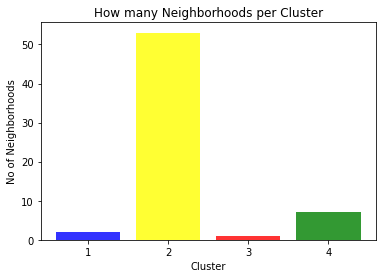

In [59]:
objects = (1,2,3,4)
y_pos = np.arange(len(objects))
performance = fish_chips['Cluster Labels'].value_counts().to_frame().sort_index(ascending=True)
perf = performance['Cluster Labels'].tolist()
plt.bar(y_pos, perf, align='center', alpha=0.8, color=['blue', 'yellow','red', 'green'])
plt.xticks(y_pos, objects)
plt.ylabel('No of Neighborhoods')
plt.xlabel('Cluster')
plt.title('How many Neighborhoods per Cluster')

plt.show()

# Results 

# Discussion

# Conclusion